# NBA Hall of Fame Workbook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import seaborn as sns
import warnings
from collections import Counter
from sklearn.metrics import f1_score, confusion_matrix,\
recall_score, precision_score, accuracy_score, log_loss,\
roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.model_selection import train_test_split, KFold, GridSearchCV,\
cross_val_score, RandomizedSearchCV
from sklearn.feature_selection import RFE, RFECV
from sklearn.base import clone
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,\
ExtraTreesClassifier, VotingClassifier
from imblearn.over_sampling import SMOTE

%matplotlib inline

warnings.filterwarnings('ignore')

pd.options.display.max_columns = 100

## Data Import

In [2]:
nba = pd.read_csv("data/Seasons_Stats.csv", index_col = 0)

In [3]:
nba.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


## Data Cleaning

### Cleaning the NBA Dataframe

In [4]:
nba['Year'] = np.where((nba['Year'].isna()), 1950, nba['Year'])
nba['Age'] = np.where((nba['Age'].isna()), nba['Age'].mean(), nba['Age'])

In [5]:
integer_types = ['Year', 'Age']

nba[integer_types] = nba[integer_types].astype(int)
nba.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950,Curly Armstrong,G-F,31,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950,Cliff Barker,SG,29,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950,Leo Barnhorst,SF,25,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950,Ed Bartels,F,24,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950,Ed Bartels,F,24,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


## Feature Engineering

#### Reading in Separate Dataframe to Capture NBA Champions

In [6]:
champs = pd.read_csv("data/champions.csv")

In [7]:
champs.head()

,Year,League,Champion,Tm,Runner_Up,Runner_Up_Code
0,2020,NBA,Los Angeles Lakers,LAL,Miami Heat,LAL
1,2019,NBA,Toronto Raptors,TOR,Golden State Warriors,TOR
2,2018,NBA,Golden State Warriors,GSW,Cleveland Cavaliers,GSW
3,2017,NBA,Golden State Warriors,GSW,Cleveland Cavaliers,GSW
4,2016,NBA,Cleveland Cavaliers,CLE,Golden State Warriors,CLE


### Reading in Separate Dataframe to Capture NBA All-Stars

In [8]:
all_stars = pd.read_csv("data/all_stars.csv", encoding='latin-1')
all_stars.head()

,Player,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 25,MP.1,PTS.1,TRB.1,AST.1
0,Kareem Abdul-Jabbar,18,13.0,449.0,105,213,0.493,0.0,1.0,0.000,105,212,0.495,41,50,0.820,33.0,84.0,149,51,6.0,31.0,28.0,57,251,NaN,24.9,13.9,8.3,2.8
1,LeBron James,17,17.0,473.0,161,310,0.519,38.0,119.0,0.319,123,191,0.644,29,40,0.725,13.0,90.0,103,98,19.0,7.0,55.0,18,389,NaN,27.8,22.9,6.1,5.8
2,Kobe Bryant,15,15.0,415.0,119,238,0.500,22.0,68.0,0.324,97,170,0.571,30,38,0.789,28.0,47.0,75,70,38.0,6.0,35.0,35,290,NaN,27.7,19.3,5.0,4.7
3,Tim Duncan,15,12.0,311.0,63,115,0.548,1.0,4.0,0.250,62,111,0.559,13,17,0.765,38.0,98.0,136,31,13.0,8.0,31.0,16,140,NaN,20.7,9.3,9.1,2.1
4,Kevin Garnett,14,11.0,287.0,72,141,0.511,0.0,4.0,0.000,72,137,0.526,14,16,0.875,25.0,63.0,88,40,16.0,11.0,20.0,10,158,NaN,20.5,11.3,6.3,2.9


In [9]:
all_stars_new = all_stars[['Player', 'G']]

### Reading in Player Data for Supplementary Statistics

In [10]:
player_data = pd.read_csv("data/player_data.csv")
player_data.head()

,Player,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,10-Jun,240.0,24-Jun-68,Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,9-Jun,235.0,7-Apr-46,Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,2-Jul,225.0,16-Apr-47,"University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,1-Jun,162.0,9-Mar-69,Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-Jun,223.0,3-Nov-74,San Jose State University


In [11]:
player_data.shape

(4550, 8)

In [12]:
player_data['seasons'] = player_data['year_end'] - player_data['year_start']

player_data.head()

,Player,year_start,year_end,position,height,weight,birth_date,college,seasons
0,Alaa Abdelnaby,1991,1995,F-C,10-Jun,240.0,24-Jun-68,Duke University,4
1,Zaid Abdul-Aziz,1969,1978,C-F,9-Jun,235.0,7-Apr-46,Iowa State University,9
2,Kareem Abdul-Jabbar,1970,1989,C,2-Jul,225.0,16-Apr-47,"University of California, Los Angeles",19
3,Mahmoud Abdul-Rauf,1991,2001,G,1-Jun,162.0,9-Mar-69,Louisiana State University,10
4,Tariq Abdul-Wahad,1998,2003,F,6-Jun,223.0,3-Nov-74,San Jose State University,5


In [13]:
player_data_retired = player_data[['Player', 'year_end']]

### Reading in MVP Dataframe

In [14]:
nba_mvp = pd.read_csv("data/mvp_agg.csv")
nba_mvp.head()

,Player,MVP
0,Kareem Abdul-Jabbar,6
1,Michael Jordan,5
2,Bill Russell,5
3,Wilt Chamberlain,4
4,LeBron James,4


### Reading Defensive Player of the Year Data

In [15]:
nba_dpoy = pd.read_csv("data/dpoy.csv")
nba_dpoy.head()

,Player,DPOY
0,Dikembe Mutombo,4
1,Ben Wallace,4
2,Dwight Howard,3
3,Mark Eaton,2
4,Rudy Gobert,2


### Reading in Finals MVP Data

In [16]:
finals_mvp = pd.read_csv("data/finals_mvp.csv")
finals_mvp.head()

,Player,Finals_MVP
0,Michael Jordan,6
1,LeBron James,4
2,Tim Duncan,3
3,Magic Johnson,3
4,Shaquille O'Neal,3


### Removing Total Index Values

In [17]:
nba = nba[nba.Tm != 'TOT']

### Adding Indexes for Comparing Datasets

#### Generating Hall of Fame Categorical Target Variable

In [18]:
nba['HOF'] = [1 if x == True else 0 for x in nba['Player'].str.endswith('*')]

In [19]:
nba['HOF'].value_counts()

0    21082
1     1486
Name: HOF, dtype: int64

#### Adding Categorical Variables for Championship Teams & All Star Appearances

In [20]:
nba['concat'] = nba['Year'].astype(str) + nba['Tm']
champs['concat'] = champs['Year'].astype(str) + champs['Tm']
champs['runner_up'] = champs['Year'].astype(str) + champs['Runner_Up_Code']

nba['champ'] = nba['concat'].isin(champs['concat']).astype(int)
nba['runner_up'] = nba['concat'].isin(champs['runner_up']).astype(int)


nba['all_star'] = nba['Player'].isin(all_stars['Player']).astype(int)
nba['teams'] = nba.groupby('Player')['Tm'].transform('count')
nba['Player'] = nba['Player'].str.replace('*', '')
nba.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,HOF,concat,champ,runner_up,all_star,teams
0,1950,Curly Armstrong,G-F,31,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0,0,1950FTW,0,0,0,2.0
1,1950,Cliff Barker,SG,29,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0,0,1950INO,0,0,0,3.0
2,1950,Leo Barnhorst,SF,25,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0,0,1950CHS,0,0,1,4.0
4,1950,Ed Bartels,F,24,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0,0,1950DNN,0,0,0,3.0
5,1950,Ed Bartels,F,24,NYK,2.0,NaN,NaN,NaN,0.376,NaN,0.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,0.250,NaN,NaN,NaN,1.0,4.0,0.250,0.250,2.0,3.0,0.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,4.0,0,1950NYK,0,0,0,3.0


In [21]:
nba[nba['Player'] == 'Eddie Johnson']

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,HOF,concat,champ,runner_up,all_star,teams
5177,1978,Eddie Johnson,SG,22,ATL,79.0,NaN,1875.0,13.6,0.535,NaN,0.293,2.9,6.1,4.4,18.9,2.5,0.1,17.8,20.2,NaN,1.8,1.8,3.5,0.091,NaN,0.0,-0.9,-1.0,0.5,332.0,686.0,0.484,NaN,NaN,NaN,332.0,686.0,0.484,0.484,164.0,201.0,0.816,51.0,102.0,153.0,235.0,100.0,4.0,168.0,232.0,828.0,0,1978ATL,0,0,1,30.0
5540,1979,Eddie Johnson,SG,23,ATL,78.0,NaN,2413.0,16.7,0.561,NaN,0.297,2.8,4.9,3.8,22.1,2.3,0.3,16.1,21.7,NaN,4.4,1.9,6.3,0.126,NaN,2.2,-1.2,1.0,1.8,501.0,982.0,0.510,NaN,NaN,NaN,501.0,982.0,0.510,0.510,243.0,292.0,0.832,65.0,105.0,170.0,360.0,121.0,11.0,213.0,241.0,1245.0,0,1979ATL,0,0,1,30.0
5885,1980,Eddie Johnson,SG,24,ATL,79.0,NaN,2622.0,18.0,0.538,0.011,0.279,3.9,4.3,4.1,23.5,2.2,0.5,12.2,24.1,NaN,5.4,2.7,8.2,0.150,NaN,2.9,-0.7,2.2,2.8,590.0,1212.0,0.487,5.0,13.0,0.385,585.0,1199.0,0.488,0.489,280.0,338.0,0.828,95.0,105.0,200.0,370.0,120.0,24.0,189.0,216.0,1465.0,0,1980ATL,0,0,1,30.0
6240,1981,Eddie Johnson,SG,25,ATL,75.0,NaN,2693.0,17.9,0.554,0.018,0.313,2.5,5.1,3.8,24.7,2.3,0.2,13.2,22.9,NaN,5.3,1.5,6.9,0.122,NaN,2.7,-1.7,1.0,2.0,573.0,1136.0,0.504,6.0,20.0,0.300,567.0,1116.0,0.508,0.507,279.0,356.0,0.784,60.0,119.0,179.0,407.0,126.0,11.0,197.0,188.0,1431.0,0,1981ATL,0,0,1,30.0
6605,1982,Eddie Johnson,SG,26,ATL,68.0,57.0,2314.0,16.5,0.513,0.030,0.381,3.1,6.3,4.7,25.3,2.2,0.4,13.6,25.6,NaN,2.2,2.6,4.8,0.100,NaN,1.4,-0.5,0.9,1.7,455.0,1011.0,0.450,7.0,30.0,0.233,448.0,981.0,0.457,0.454,294.0,385.0,0.764,63.0,128.0,191.0,358.0,102.0,16.0,186.0,188.0,1211.0,0,1982ATL,0,0,1,30.0
6606,1982,Eddie Johnson,SF,22,KCK,74.0,27.0,1517.0,13.1,0.487,0.017,0.232,9.2,14.8,11.9,10.1,1.6,0.5,12.0,21.7,NaN,0.3,1.4,1.8,0.056,NaN,-1.1,-0.5,-1.6,0.1,295.0,643.0,0.459,1.0,11.0,0.091,294.0,632.0,0.465,0.460,99.0,149.0,0.664,128.0,194.0,322.0,109.0,50.0,14.0,97.0,210.0,690.0,0,1982KCK,0,0,1,30.0
6978,1983,Eddie Johnson,SG,27,ATL,61.0,57.0,1813.0,16.0,0.508,0.048,0.276,1.5,5.7,3.6,27.7,1.6,0.2,13.9,25.7,NaN,1.6,1.5,3.0,0.081,NaN,0.9,-2.2,-1.3,0.3,389.0,858.0,0.453,14.0,41.0,0.341,375.0,817.0,0.459,0.462,186.0,237.0,0.785,26.0,98.0,124.0,318.0,61.0,6.0,156.0,138.0,978.0,0,1983ATL,0,0,1,30.0
6979,1983,Eddie Johnson,SF,23,KCK,82.0,82.0,2933.0,15.9,0.537,0.052,0.231,7.0,11.4,9.2,10.4,1.1,0.4,10.7,22.2,NaN,5.3,2.1,7.4,0.121,NaN,1.7,-1.0,0.8,2.1,677.0,1370.0,0.494,20.0,71.0,0.282,657.0,1299.0,0.506,0.501,247.0,317.0,0.779,191.0,310.0,501.0,216.0,70.0,20.0,181.0,259.0,1621.0,0,1983KCK,0,0,1,30.0
7344,1984,Eddie Johnson,SG,28,ATL,67.0,43.0,1893.0,14.2,0.497,0.054,0.267,1.8,7.0,4.4,31.5,1.5,0.2,16.2,24.3,NaN,0.3,1.4,1.7,0.044,NaN,-0.1,-2.0,-2.2,-0.1,353.0,798.0,0.442,16.0,43.0,0.372,337.0,755.0,0.446,0.452,164.0,213.0,0.770,31.0,115.0,146.0,374.0,58.0,7.0,173.0,155.0,886.0,0,1984ATL,0,0,1,30.0
7345,1984,Eddie Johnson,SF,24,KCK,82.0,82.0,2920.0,16.6,0.528,0.041,0.213,6.3,11.5,8.9,16.0,1.2,0.4,11.1,26.3,NaN,3.4,2.2,5.6,0.093,NaN,1.6,-0.9,0.7,2.0,753.0,1552.0,0.485,20.0,64.0,0.313,733.0,1488.0,0.493,0.492,268.0,331.0,0.810,165.0,290.0,455.0,296.0,76.0,21.0,213.0,266.0,1794.0,0,1984KCK,0,0,1,30.0


### Group Dataframe by Player Name

In [22]:
nba_total = nba.groupby(['Player', 'Year']).agg({'PTS': ['sum'], 'AST': ['sum'], 'TOV': ['sum'], 'ORB': ['sum'], 'DRB': ['sum'],'TRB': ['sum'], 'BLK': ['sum'], 'STL': ['sum'], 'G': ['sum'], 'GS': ['sum'], 'MP': ['sum'], 'FG': ['sum'], 'FGA': ['sum'], '3P': ['sum'], '3PA': ['sum'], 'FT': ['sum'], 'FTA': ['sum'], 'PF': ['sum'], 'HOF': ['sum'], 'champ': ['sum'], 'runner_up': ['sum']})
nba_total.columns = ['PTS', 'AST', 'TOV', 'ORB', 'DRB','TRB', 'BLK', 'STL', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'PF', 'HOF', 'champ', 'runner_up']
nba_total = nba_total.reset_index()
nba_total.head()

,Player,Year,PTS,AST,TOV,ORB,DRB,TRB,BLK,STL,G,GS,MP,FG,FGA,3P,3PA,FT,FTA,PF,HOF,champ,runner_up
0,A.C. Green,1986,521.0,54.0,99.0,160.0,221.0,381.0,49.0,49.0,82.0,1.0,1542.0,209.0,388.0,1.0,6.0,102.0,167.0,229.0,0,0,0
1,A.C. Green,1987,852.0,84.0,102.0,210.0,405.0,615.0,80.0,70.0,79.0,72.0,2240.0,316.0,587.0,0.0,5.0,220.0,282.0,171.0,0,1,0
2,A.C. Green,1988,937.0,93.0,120.0,245.0,465.0,710.0,45.0,87.0,82.0,64.0,2636.0,322.0,640.0,0.0,2.0,293.0,379.0,204.0,0,1,0
3,A.C. Green,1989,1088.0,103.0,119.0,258.0,481.0,739.0,55.0,94.0,82.0,82.0,2510.0,401.0,758.0,4.0,17.0,282.0,359.0,172.0,0,0,1
4,A.C. Green,1990,1061.0,90.0,116.0,262.0,450.0,712.0,50.0,66.0,82.0,82.0,2709.0,385.0,806.0,13.0,46.0,278.0,370.0,207.0,0,0,0


#### Adding Years in the League Variable before Reshaping Dataframe

In [23]:
nba_total['yrs_in_lg'] = np.where((nba_total['Year'] >= 1950), 1, 0)

In [24]:
nba_total.head()

,Player,Year,PTS,AST,TOV,ORB,DRB,TRB,BLK,STL,G,GS,MP,FG,FGA,3P,3PA,FT,FTA,PF,HOF,champ,runner_up,yrs_in_lg
0,A.C. Green,1986,521.0,54.0,99.0,160.0,221.0,381.0,49.0,49.0,82.0,1.0,1542.0,209.0,388.0,1.0,6.0,102.0,167.0,229.0,0,0,0,1
1,A.C. Green,1987,852.0,84.0,102.0,210.0,405.0,615.0,80.0,70.0,79.0,72.0,2240.0,316.0,587.0,0.0,5.0,220.0,282.0,171.0,0,1,0,1
2,A.C. Green,1988,937.0,93.0,120.0,245.0,465.0,710.0,45.0,87.0,82.0,64.0,2636.0,322.0,640.0,0.0,2.0,293.0,379.0,204.0,0,1,0,1
3,A.C. Green,1989,1088.0,103.0,119.0,258.0,481.0,739.0,55.0,94.0,82.0,82.0,2510.0,401.0,758.0,4.0,17.0,282.0,359.0,172.0,0,0,1,1
4,A.C. Green,1990,1061.0,90.0,116.0,262.0,450.0,712.0,50.0,66.0,82.0,82.0,2709.0,385.0,806.0,13.0,46.0,278.0,370.0,207.0,0,0,0,1


#### Reshaping Dataframe by Groupby to Eliminate Duplicate Years

In [25]:
nba_total = nba_total.groupby(['Player'], dropna = False)[['PTS', 'AST', 'TOV', 'ORB', 'DRB','TRB', 'BLK', 'STL', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'PF', 'HOF', 'champ', 'runner_up', 'yrs_in_lg']].sum().reset_index()
nba_total.head()

,Player,PTS,AST,TOV,ORB,DRB,TRB,BLK,STL,G,GS,MP,FG,FGA,3P,3PA,FT,FTA,PF,HOF,champ,runner_up,yrs_in_lg
0,A.C. Green,12331.0,1400.0,1434.0,3354.0,6119.0,9473.0,546.0,1033.0,1278.0,832.0,36552.0,4544.0,9202.0,124.0,489.0,3119.0,4250.0,2436.0,0,3,2,16
1,A.J. Bramlett,8.0,0.0,3.0,12.0,10.0,22.0,0.0,1.0,8.0,0.0,61.0,4.0,21.0,0.0,0.0,0.0,0.0,13.0,0,0,0,1
2,A.J. English,1502.0,320.0,203.0,140.0,175.0,315.0,24.0,57.0,151.0,18.0,3108.0,617.0,1418.0,9.0,65.0,259.0,333.0,287.0,0,0,0,2
3,A.J. Guyton,442.0,147.0,62.0,22.0,58.0,80.0,12.0,20.0,80.0,14.0,1246.0,166.0,440.0,73.0,193.0,37.0,45.0,58.0,0,0,0,3
4,A.J. Hammons,48.0,4.0,10.0,8.0,28.0,36.0,13.0,1.0,22.0,0.0,163.0,17.0,42.0,5.0,10.0,9.0,20.0,21.0,0,0,0,1


#### Adding Teams Played for by Player

In [26]:
nba_slice = nba.groupby('Player')['teams'].mean()
nba_total = pd.merge(nba_total, nba_slice, on = 'Player', how = 'left')

#### Adding MVP Winners

In [27]:
nba_total = pd.merge(nba_total, nba_mvp, on = 'Player', how = 'left')

#### Adding DPOY Winners

In [28]:
nba_total = pd.merge(nba_total, nba_dpoy, on = 'Player', how = 'left')

#### Adding Finals MVP Winners

In [29]:
nba_total = pd.merge(nba_total, finals_mvp, on = 'Player', how = 'left')

#### Adding Retired Players Final Year

In [30]:
nba_total = pd.merge(nba_total, player_data_retired, on = 'Player', how = 'left')

In [31]:
nba_total.shape

(3969, 28)

In [32]:
nba_total.isna().sum()

Player           0
PTS              0
AST              0
TOV              0
ORB              0
DRB              0
TRB              0
BLK              0
STL              0
G                0
GS               0
MP               0
FG               0
FGA              0
3P               0
3PA              0
FT               0
FTA              0
PF               0
HOF              0
champ            0
runner_up        0
yrs_in_lg        0
teams            0
MVP           3928
DPOY          3946
Finals_MVP    3939
year_end        29
dtype: int64

In [33]:
nba_total.head()

,Player,PTS,AST,TOV,ORB,DRB,TRB,BLK,STL,G,GS,MP,FG,FGA,3P,3PA,FT,FTA,PF,HOF,champ,runner_up,yrs_in_lg,teams,MVP,DPOY,Finals_MVP,year_end
0,A.C. Green,12331.0,1400.0,1434.0,3354.0,6119.0,9473.0,546.0,1033.0,1278.0,832.0,36552.0,4544.0,9202.0,124.0,489.0,3119.0,4250.0,2436.0,0,3,2,16,17.0,NaN,NaN,NaN,2001.0
1,A.J. Bramlett,8.0,0.0,3.0,12.0,10.0,22.0,0.0,1.0,8.0,0.0,61.0,4.0,21.0,0.0,0.0,0.0,0.0,13.0,0,0,0,1,1.0,NaN,NaN,NaN,2000.0
2,A.J. English,1502.0,320.0,203.0,140.0,175.0,315.0,24.0,57.0,151.0,18.0,3108.0,617.0,1418.0,9.0,65.0,259.0,333.0,287.0,0,0,0,2,2.0,NaN,NaN,NaN,1992.0
3,A.J. Guyton,442.0,147.0,62.0,22.0,58.0,80.0,12.0,20.0,80.0,14.0,1246.0,166.0,440.0,73.0,193.0,37.0,45.0,58.0,0,0,0,3,3.0,NaN,NaN,NaN,2003.0
4,A.J. Hammons,48.0,4.0,10.0,8.0,28.0,36.0,13.0,1.0,22.0,0.0,163.0,17.0,42.0,5.0,10.0,9.0,20.0,21.0,0,0,0,1,1.0,NaN,NaN,NaN,2017.0


### Bringing in All Star Totals for players

In [34]:
nba_total = pd.merge(nba_total, all_stars_new, on = 'Player', how = 'left')
nba_total.rename(columns = {'G_y':'all_star_app'}, inplace = True)

### Creating In-Game Statistics

In [35]:
nba_total['PPG'] = nba_total.PTS/nba_total.G_x
nba_total['APG'] = nba_total.AST/nba_total.G_x
nba_total['RPG'] = nba_total.TRB/nba_total.G_x
nba_total['BPG'] = nba_total.BLK/nba_total.G_x
nba_total['SPG'] = nba_total.STL/nba_total.G_x
nba_total['TPG'] = nba_total.TOV/nba_total.G_x
nba_total['3PG'] = nba_total['3P']/nba_total.G_x
nba_total['FG%'] = nba_total.FG/nba_total.FGA
nba_total['3P%'] = nba_total['3P']/nba_total['3PA']
nba_total['FT%'] = nba_total.FT/nba_total.FTA

In [36]:
# Take advanced statistics out of dataframe so that they aren't affected by seasonal totals
advanced_stats = nba.groupby('Player', dropna = False)['USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'TS%', 'PER', 'eFG%'].mean()

In [37]:
nba_total = pd.merge(nba_total, advanced_stats, on = 'Player', how = 'left')
nba_total.rename(columns = {'G_x':'Games'}, inplace = True)

In [38]:
# Fixing HOF totals
nba_total['HOF'] = np.where((nba_total['HOF'] >= 1), 1, 0)

# Adding Players Qualified for the HOF
nba_total['HOF_Q'] = np.where((nba_total['year_end'] >= 2013), 0, 1)

# Fixing HOF Qualified totals
nba_total['HOF_Q'] = np.where((nba_total['HOF_Q'] >= 1), 1, 0)

# Fixing MVP NaN Values
nba_total['MVP'].fillna(0, inplace = True)

# Fixing DPOY NaN Values
nba_total['DPOY'].fillna(0, inplace = True)

# Fixing Finals MVP NaN Values
nba_total['Finals_MVP'].fillna(0, inplace = True)

# Variable for finals appearances
nba_total['finals_app'] = nba_total['champ'] + nba_total['runner_up']

# Dealing with NaN values in all-star appearances
nba_total['all_star_app'].fillna(0, inplace = True)

# Removing the outlier Eddie Johnson
nba_total = nba_total[nba_total['Player'] != 'Eddie Johnson']

# 20 & 5 Players
nba_total['20/5'] = np.where((nba_total['PPG'] >= 20) & (nba_total['APG'] >= 5) & (nba_total['RPG'] >= 5), 1, 0)

# 20 & 10 Players - Assists
nba_total['20/10_A'] = np.where((nba_total['PPG'] >= 20) & (nba_total['APG'] >= 10), 1, 0)

# 20 & 10 Players - Rebounds
nba_total['20/10_B'] = np.where((nba_total['PPG'] >= 20) & (nba_total['RPG'] >= 10), 1, 0)

# Title winning All Stars
nba_total['title_star'] = np.where((nba_total['champ'] >= 1) & (nba_total['all_star_app'] >= 1), 1, 0)

# All-time leaders in points
nba_total['leader_pts'] = np.where((nba_total['PTS'] >= 20_000), 1, 0)

# All-time leaders in rebounds
nba_total['leader_reb'] = np.where((nba_total['TRB'] >= 10_000), 1, 0)

# All-time leaders in assists
nba_total['leader_ast'] = np.where((nba_total['AST'] >= 6_000), 1, 0)

# All-time leaders in freethrows
nba_total['leader_ft'] = np.where((nba_total['FT'] >= 5_000), 1, 0)

# All-time leaders in freethrow percentage
nba_total['leader_ft%'] = np.where((nba_total['FT%'] >= 0.75), 1, 0)

In [39]:
nba_total.head()

,Player,PTS,AST,TOV,ORB,DRB,TRB,BLK,STL,Games,GS,MP,FG,FGA,3P,3PA,FT,FTA,PF,HOF,champ,runner_up,yrs_in_lg,teams,MVP,DPOY,Finals_MVP,year_end,all_star_app,PPG,APG,RPG,BPG,SPG,TPG,3PG,FG%,3P%,FT%,USG%,OWS,DWS,WS,WS/48,TS%,PER,eFG%,HOF_Q,finals_app,20/5,20/10_A,20/10_B,title_star,leader_pts,leader_reb,leader_ast,leader_ft,leader_ft%
0,A.C. Green,12331.0,1400.0,1434.0,3354.0,6119.0,9473.0,546.0,1033.0,1278.0,832.0,36552.0,4544.0,9202.0,124.0,489.0,3119.0,4250.0,2436.0,0,3,2,16,17.0,0.0,0.0,0.0,2001.0,1.0,9.648670,1.095462,7.412363,0.427230,0.808294,1.122066,0.097027,0.493806,0.253579,0.733882,14.558824,3.429412,2.417647,5.847059,0.123824,0.544765,13.958824,0.493647,1,5,0,0,0,1,0,0,0,0,0
1,A.J. Bramlett,8.0,0.0,3.0,12.0,10.0,22.0,0.0,1.0,8.0,0.0,61.0,4.0,21.0,0.0,0.0,0.0,0.0,13.0,0,0,0,1,1.0,0.0,0.0,0.0,2000.0,0.0,1.000000,0.000000,2.750000,0.000000,0.125000,0.375000,0.000000,0.190476,NaN,NaN,17.100000,-0.200000,0.100000,-0.200000,-0.129000,0.190000,-0.400000,0.190000,1,0,0,0,0,0,0,0,0,0,0
2,A.J. English,1502.0,320.0,203.0,140.0,175.0,315.0,24.0,57.0,151.0,18.0,3108.0,617.0,1418.0,9.0,65.0,259.0,333.0,287.0,0,0,0,2,2.0,0.0,0.0,0.0,1992.0,0.0,9.947020,2.119205,2.086093,0.158940,0.377483,1.344371,0.059603,0.435120,0.138462,0.777778,23.700000,-0.200000,0.700000,0.550000,0.016500,0.480000,11.550000,0.438500,1,0,0,0,0,0,0,0,0,0,1
3,A.J. Guyton,442.0,147.0,62.0,22.0,58.0,80.0,12.0,20.0,80.0,14.0,1246.0,166.0,440.0,73.0,193.0,37.0,45.0,58.0,0,0,0,3,3.0,0.0,0.0,0.0,2003.0,0.0,5.525000,1.837500,1.000000,0.150000,0.250000,0.775000,0.912500,0.377273,0.378238,0.822222,20.766667,0.100000,-0.033333,0.100000,-0.141333,0.324000,4.366667,0.310667,1,0,0,0,0,0,0,0,0,0,1
4,A.J. Hammons,48.0,4.0,10.0,8.0,28.0,36.0,13.0,1.0,22.0,0.0,163.0,17.0,42.0,5.0,10.0,9.0,20.0,21.0,0,0,0,1,1.0,0.0,0.0,0.0,2017.0,0.0,2.181818,0.181818,1.636364,0.590909,0.045455,0.454545,0.227273,0.404762,0.500000,0.450000,17.600000,-0.200000,0.200000,0.000000,-0.001000,0.472000,8.400000,0.464000,0,0,0,0,0,0,0,0,0,0,0


## EDA

### Splitting Dataframe Between Players Eligible & Not for HOF

In [40]:
nba_retired = nba_total[nba_total['HOF_Q'] == 1]

In [41]:
nba_active = nba_total[nba_total['HOF_Q'] == 0]

#### Pair Plot

In [42]:
# stats = ['HOF', 'BLK', 'STL', 'PPG', 'APG', 'RPG', 'USG%', 'OWS', 'DWS', 'WS', 'TS%', 'PER', 'eFG%', 'champ', 'runner_up', 'all_star_app']

# pair_plt_stats = nba_total[stats]

# sns.pairplot(pair_plt_stats, hue = 'HOF')

# # plt.savefig('nba_pair_plt.png')
# plt.show();

In [132]:
fig = px.scatter_3d(nba_retired, x='all_star_app', y='WS', z='FT', color='MVP', symbol='HOF', size_max=18, opacity=0.6,\
                   color_continuous_scale='YlGnBu')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
#fig.show()

#### Correlation Matrix

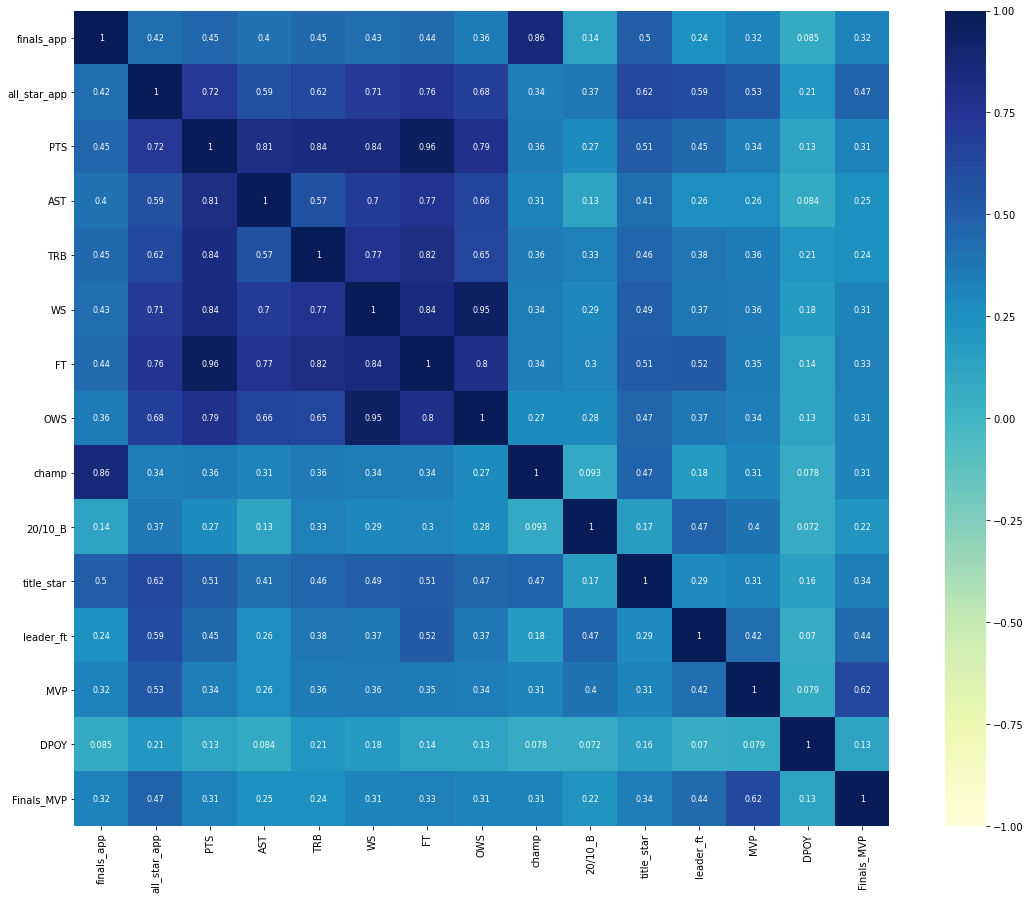

In [44]:
correlation_features = ['finals_app', 'all_star_app', 'PTS', 'AST', 'TRB', 'WS', 'FT', 'OWS', 'champ', '20/10_B',\
                        'title_star', 'leader_ft', 'MVP', 'DPOY', 'Finals_MVP']


nba_corr = nba_total[correlation_features].corr()
plt.subplots(figsize=(20,15))

corr = nba_corr
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

sns.heatmap(corr, 
    annot=True, 
    annot_kws={"fontsize":8},
    xticklabels = nba_corr.columns.values, # x labels
    yticklabels = nba_corr.columns.values, # y labels
    vmin = -1, # color scale the min value
    vmax = 1, # color scale the max
    center = 0, # color scale place at the center at 0
    cmap = "YlGnBu", # color palette
    square = True) # each cell will be square-shaped
plt.show();

#### Takeaways

- FG & PTS highly correlated
    - Remove FG <br><br>
- FT & Points highly correlated
    - Remove PTS <br><br>
- OWS & WS highly correlated
    - Remove OWS <br><br>

#### Stat Correlation Bar Chart with HOF Players

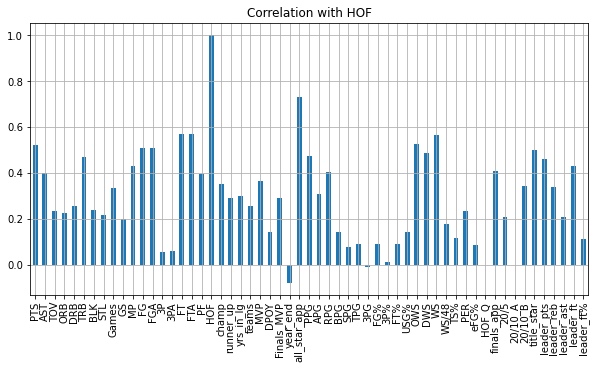

In [45]:
nba_retired.corrwith(nba_retired.HOF).plot.bar(figsize = (10, 5), title = "Correlation with HOF", 
                                        fontsize = 10,rot = 90, grid = True);

#### PPG by HOF's

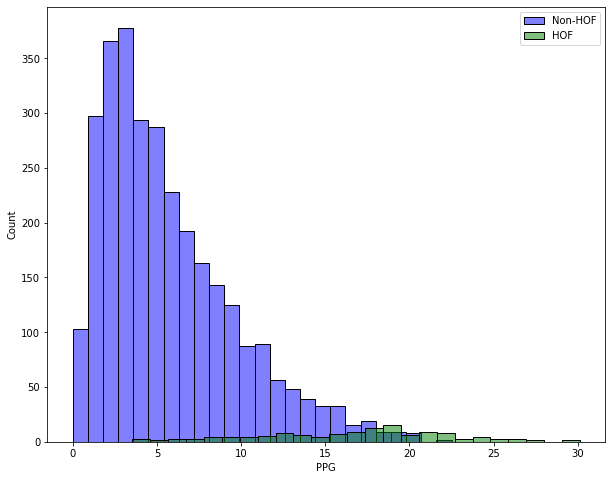

In [46]:
fig, ax = plt.subplots(figsize = (10,8))
sns.histplot(nba_retired[nba_retired['HOF'] == 0].PPG, bins = 25, label = 'Non-HOF', alpha = .50, edgecolor = 'black', color = 'blue')
sns.histplot(nba_retired[nba_retired['HOF'] == 1].PPG, bins = 25, label = 'HOF', alpha = .50, edgecolor = 'black', color = 'green')
plt.legend(loc = 'upper right')

#### Games Played by HOF's

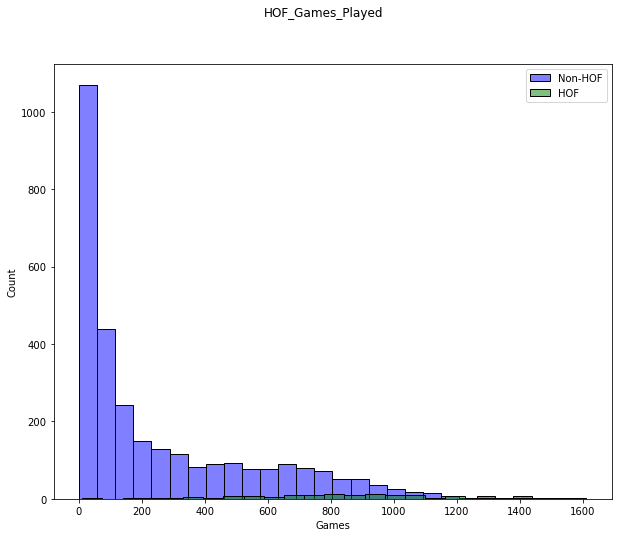

In [47]:
fig, ax = plt.subplots(figsize = (10,8))
sns.histplot(nba_retired[nba_retired['HOF'] == 0].Games, bins = 25, label = 'Non-HOF', alpha = .50, edgecolor = 'black', color = 'blue')
sns.histplot(nba_retired[nba_retired['HOF'] == 1].Games, bins = 25, label = 'HOF', alpha = .50, edgecolor = 'black', color = 'green')
fig.suptitle("HOF_Games_Played")
plt.legend(loc = 'upper right');

''

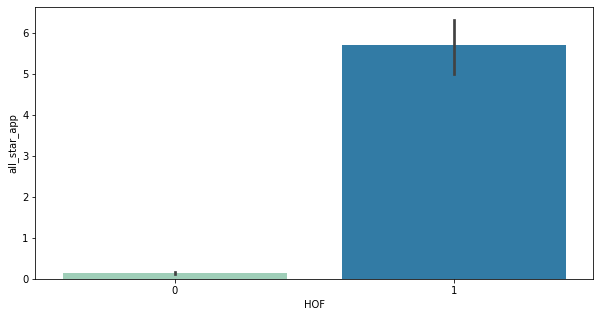

In [147]:
x_line = nba_retired['HOF']
y_line = nba_retired['all_star_app']

plt.figure(figsize=(10, 5))
sns.barplot(data = nba_total, x = x_line, y = y_line, palette = 'YlGnBu')
;

#### All-Star Appearances by HOF's

<AxesSubplot:xlabel='HOF', ylabel='all_star_app'>

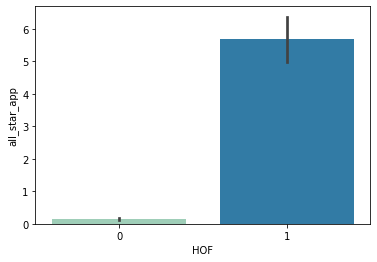

In [146]:
sns.barplot(x = nba_retired.HOF, y = nba_retired.all_star_app, palette = 'YlGnBu')

#### Points Scored vs PER

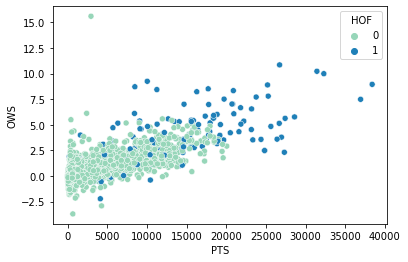

In [148]:
fig, ax = plt.subplots()
sns.scatterplot(x = nba_retired.PTS, y = nba_retired.OWS, hue = nba_retired['HOF'], palette = 'YlGnBu')
ax.yaxis.label.set_color("black")
ax.xaxis.label.set_color("black")
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black');
# plt.savefig('HOF_PTS_OWS2');

### NBA Player Overlap of All-Stars, Champions, and Point Totals

In [133]:
fig = px.scatter_3d(nba_retired, x='all_star_app', y='champ', z='PTS', color='HOF', size_max=18, opacity=0.6,\
                   color_continuous_scale='YlGnBu')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [52]:
nba_retired.sort_values(by = 'PTS', ascending = False)

,Player,PTS,AST,TOV,ORB,DRB,TRB,BLK,STL,Games,GS,MP,FG,FGA,3P,3PA,FT,FTA,PF,HOF,champ,runner_up,yrs_in_lg,teams,MVP,DPOY,Finals_MVP,year_end,all_star_app,PPG,APG,RPG,BPG,SPG,TPG,3PG,FG%,3P%,FT%,USG%,OWS,DWS,WS,WS/48,TS%,PER,eFG%,HOF_Q,finals_app,20/5,20/10_A,20/10_B,title_star,leader_pts,leader_reb,leader_ast,leader_ft,leader_ft%
2211,Kareem Abdul-Jabbar,38387.0,5660.0,2527.0,2975.0,9394.0,17440.0,3189.0,1160.0,1560.0,625.0,57446.0,15837.0,28307.0,1.0,18.0,6712.0,9304.0,4657.0,1,6,4,20,20.0,6.0,0.0,2.0,1989.0,18.0,24.607051,3.628205,11.179487,2.044231,0.743590,1.619872,0.000641,0.559473,0.055556,0.721410,24.208333,8.950000,4.725000,13.665000,0.220500,0.591500,24.085000,0.558350,1,10,0,0,1,1,1,1,0,1,0
2213,Karl Malone,36928.0,5248.0,4524.0,3562.0,11406.0,14968.0,1145.0,2085.0,1476.0,1471.0,54852.0,13528.0,26210.0,85.0,310.0,9787.0,13188.0,4578.0,1,0,3,19,19.0,2.0,0.0,0.0,2004.0,12.0,25.018970,3.555556,10.140921,0.775745,1.412602,3.065041,0.057588,0.516139,0.274194,0.742114,29.115789,7.489474,4.873684,12.347368,0.202789,0.573526,23.642105,0.514474,1,3,0,0,1,0,1,1,0,1,0
2720,Michael Jordan,32292.0,5633.0,2924.0,1668.0,5004.0,6672.0,893.0,2514.0,1072.0,1039.0,41011.0,12192.0,24537.0,581.0,1778.0,7327.0,8772.0,2783.0,1,6,0,15,15.0,5.0,1.0,6.0,2003.0,13.0,30.123134,5.254664,6.223881,0.833022,2.345149,2.727612,0.541978,0.496882,0.326772,0.835271,33.600000,9.993333,4.280000,14.260000,0.236600,0.559467,27.373333,0.500000,1,6,1,0,0,1,1,0,0,1,1
3931,Wilt Chamberlain,31419.0,4643.0,0.0,0.0,0.0,23924.0,0.0,0.0,1045.0,0.0,47859.0,12681.0,23497.0,0.0,0.0,6057.0,11862.0,2075.0,1,2,4,14,15.0,4.0,0.0,1.0,1973.0,13.0,30.066029,4.443062,22.893780,0.000000,0.000000,0.000000,0.000000,0.539686,NaN,0.510622,NaN,10.226667,6.266667,16.480000,0.244133,0.559067,26.140000,0.563000,1,6,0,0,1,1,1,1,0,1,0
3438,Shaquille O'Neal,28596.0,3026.0,3310.0,4209.0,8890.0,13099.0,2732.0,739.0,1207.0,1197.0,41918.0,11330.0,19457.0,1.0,22.0,5935.0,11252.0,4146.0,1,4,2,19,20.0,1.0,0.0,3.0,2011.0,12.0,23.691798,2.507042,10.852527,2.263463,0.612262,2.742336,0.000829,0.582310,0.045455,0.527462,28.705000,5.770000,3.320000,9.085000,0.191800,0.588050,25.110000,0.587200,1,6,0,0,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Alex Scales,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1.0,0.0,0.0,0.0,2006.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0
3131,Ray Radziszewski,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,6.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1,1.0,0.0,0.0,0.0,1958.0,0.0,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,-0.100000,0.000000,-0.100000,-0.496000,0.000000,-8.900000,0.000000,1,0,0,0,0,0,0,0,0,0,0
3680,Tom Hovasse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0,0,1,1.0,0.0,0.0,0.0,1995.0,0.0,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,NaN,11.300000,0.000000,0.000000,0.000000,-0.076000,0.000000,0.200000,0.000000,1,0,0,0,0,0,0,0,0,0,0
2904,Norm Grekin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1,1.0,0.0,0.0,0.0,1954.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.010000,NaN,-23.300000,NaN,1,0,0,0,0,0,0,0,0,0,0


#### PER for HOF's

''

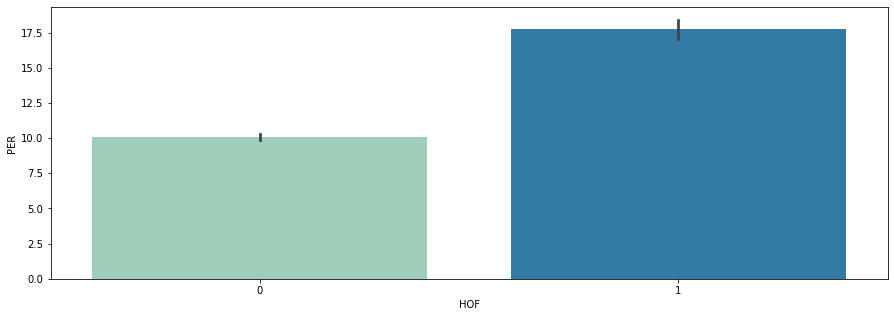

In [149]:
x_line = nba_retired['HOF']
y_line = nba_retired['PER']

plt.figure(figsize=(15, 5))
sns.barplot(data = nba_retired, x = x_line, y = y_line, palette = 'YlGnBu')
;

#### Average Win Share for HOF's

<AxesSubplot:xlabel='HOF', ylabel='WS'>

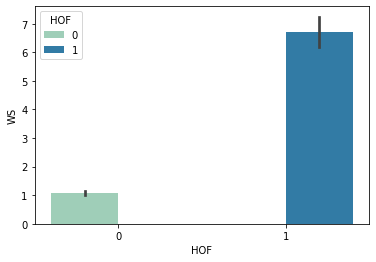

In [150]:
sns.barplot(x = nba_retired.HOF, y = nba_retired.WS, hue = nba_retired.HOF, palette = 'YlGnBu')

#### Finals Appearances of HOF's

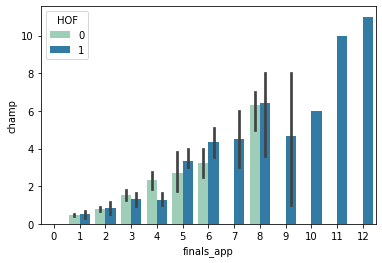

In [151]:
sns.barplot(x = nba_retired.finals_app, y = nba_retired.champ, hue = nba_retired.HOF, palette = 'YlGnBu');

#### Games Played vs HOF

<AxesSubplot:xlabel='HOF', ylabel='Games'>

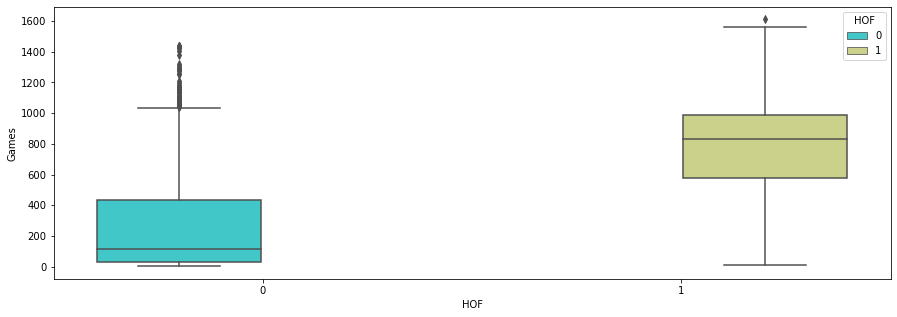

In [56]:
plt.figure(figsize=(15,5))
sns.boxplot(data = nba_retired, x = 'HOF', y = 'Games', hue = 'HOF', palette = "rainbow")

In [57]:
nba_retired.sort_values(by = 'DPOY', ascending = False)

,Player,PTS,AST,TOV,ORB,DRB,TRB,BLK,STL,Games,GS,MP,FG,FGA,3P,3PA,FT,FTA,PF,HOF,champ,runner_up,yrs_in_lg,teams,MVP,DPOY,Finals_MVP,year_end,all_star_app,PPG,APG,RPG,BPG,SPG,TPG,3PG,FG%,3P%,FT%,USG%,OWS,DWS,WS,WS/48,TS%,PER,eFG%,HOF_Q,finals_app,20/5,20/10_A,20/10_B,title_star,leader_pts,leader_reb,leader_ast,leader_ft,leader_ft%
260,Ben Wallace,6254.0,1437.0,1061.0,3444.0,7038.0,10482.0,2137.0,1369.0,1088.0,912.0,32085.0,2569.0,5421.0,7.0,51.0,1109.0,2679.0,2078.0,0,1,1,16,17.0,0.0,4.0,0.0,2012.0,4.0,5.748162,1.320772,9.634191,1.964154,1.258272,0.975184,0.006434,0.473898,0.137255,0.413960,10.711765,1.352941,4.152941,5.500000,0.119471,0.464353,14.270588,0.468294,1,2,0,0,0,1,0,1,0,0,0
1086,Dikembe Mutombo,11729.0,1240.0,2173.0,3808.0,8551.0,12359.0,3289.0,494.0,1196.0,997.0,36791.0,4169.0,8045.0,0.0,2.0,3391.0,4960.0,3383.0,1,0,2,18,19.0,0.0,4.0,0.0,2009.0,8.0,9.806856,1.036789,10.333612,2.750000,0.413043,1.816890,0.000000,0.518210,0.000000,0.683669,14.057895,2.547368,3.605263,6.163158,0.150526,0.565368,16.268421,0.504895,1,2,0,0,0,0,0,1,0,0,0
3466,Sidney Moncrief,11931.0,2793.0,1551.0,1424.0,2151.0,3575.0,228.0,924.0,767.0,513.0,23150.0,4117.0,8198.0,110.0,387.0,3587.0,4319.0,1635.0,0,0,0,11,11.0,0.0,2.0,0.0,1991.0,5.0,15.555411,3.641460,4.661017,0.297262,1.204694,2.022164,0.143416,0.502196,0.284238,0.830516,19.790909,5.581818,2.627273,8.218182,0.173091,0.588364,17.745455,0.508364,1,0,0,0,0,0,0,0,0,0,1
1562,Hakeem Olajuwon,26946.0,3058.0,3667.0,4034.0,9714.0,13748.0,3830.0,2162.0,1238.0,1186.0,44222.0,10749.0,20991.0,25.0,124.0,5423.0,7621.0,4383.0,1,2,1,18,18.0,1.0,2.0,2.0,2002.0,12.0,21.765751,2.470113,11.105008,3.093700,1.746365,2.962036,0.020194,0.512077,0.201613,0.711586,26.355556,3.794444,5.244444,9.033333,0.168111,0.545944,22.905556,0.507167,1,3,0,0,1,1,1,1,0,1,0
98,Alonzo Mourning,14311.0,946.0,2209.0,2184.0,4953.0,7137.0,2356.0,414.0,838.0,686.0,25975.0,5116.0,9701.0,22.0,89.0,4057.0,5862.0,2810.0,1,1,0,15,16.0,0.0,2.0,0.0,2008.0,4.0,17.077566,1.128878,8.516706,2.811456,0.494033,2.636038,0.026253,0.527368,0.247191,0.692085,24.450000,2.600000,3.000000,5.606250,0.153000,0.573063,20.075000,0.524250,1,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Ernie Vandeweghe,2135.0,548.0,0.0,0.0,0.0,834.0,0.0,0.0,224.0,0.0,3600.0,818.0,1942.0,0.0,0.0,499.0,674.0,753.0,0,0,3,6,6.0,0.0,0.0,0.0,1956.0,0.0,9.531250,2.446429,3.723214,0.000000,0.000000,0.000000,0.000000,0.421215,NaN,0.740356,NaN,2.166667,0.866667,3.016667,0.087250,0.446167,13.600000,0.396333,1,3,0,0,0,0,0,0,0,0,0
1318,Ervin Johnson,3473.0,387.0,724.0,1677.0,3471.0,5148.0,1087.0,471.0,845.0,452.0,16989.0,1393.0,2756.0,2.0,10.0,685.0,1133.0,2430.0,0,0,1,13,13.0,0.0,0.0,0.0,2006.0,0.0,4.110059,0.457988,6.092308,1.286391,0.557396,0.856805,0.002367,0.505443,0.200000,0.604590,11.453846,1.007692,1.923077,2.907692,0.096308,0.517615,11.153846,0.491077,1,1,0,0,0,0,0,0,0,0,0
1319,Erwin Mueller,3248.0,853.0,0.0,0.0,0.0,2050.0,0.0,0.0,425.0,0.0,9541.0,1292.0,3013.0,0.0,0.0,664.0,1059.0,898.0,0,0,1,7,10.0,0.0,0.0,0.0,1974.0,0.0,7.642353,2.007059,4.823529,0.000000,0.000000,0.000000,0.000000,0.428808,NaN,0.627007,NaN,0.150000,0.800000,0.950000,0.015500,0.438700,10.300000,0.403000,1,1,0,0,0,0,0,0,0,0,0
1320,Essie Hollis,69.0,6.0,14.0,21.0,24.0,45.0,1.0,11.0,25.0,0.0,154.0,30.0,75.0,0.0,0.0,9.0,12.0,28.0,0,0,0,1,1.0,0.0,0.0,0.0,1979.0,0.0,2.760000,0.240000,1.800000,0.040000,0.440000,0.560000,0.000000,0.400000,NaN,0.750000,23.300000,-0.100000,0.200000,0.100000,0.022000,0.430000,11.800000,0.400000,1,0,0,0,0,0,0,0,0,0,1


## Building Preliminary Model

#### Getting Categorical Variables

In [58]:
feature_cols = ['finals_app', 'all_star_app', 'AST', 'TRB', 'WS', 'FT', 'title_star', '20/10_B', 'leader_pts', 'champ', 'MVP', 'DPOY', 'Finals_MVP']

In [59]:
# model_df = nba_retired[feature_cols]
y = nba_retired['HOF']

X = nba_retired[feature_cols]#pd.get_dummies(model_df, columns = ['finals_app', 'all_star_app', 'champ', 'MVP', 'DPOY', 'Finals_MVP'], drop_first = True)

In [60]:
X.fillna(0, inplace = True)

#### Train Test Split the Data

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [62]:
#scaled_features = 

In [63]:
nba_scaled = StandardScaler()

nba_scaled.fit(X_train)
X_train_sc = pd.DataFrame(nba_scaled.transform(X_train), index = X_train.index, columns = X_train.columns)
X_test_sc = pd.DataFrame(nba_scaled.transform(X_test), index = X_test.index, columns = X_test.columns)

### Logistic Regression Model

In [64]:
logreg_model = LogisticRegression(random_state = 42, solver = 'liblinear', C = .1, class_weight = 'balanced')
logreg_model.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', random_state=42,
                   solver='liblinear')

In [65]:
cross_val_score(logreg_model, X_train, y_train, cv=3)

array([0.95558376, 0.93654822, 0.94416244])

In [66]:
y_pred_lr = logreg_model.predict(X_test)

In [67]:
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
rec_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

results = pd.DataFrame([['Logistic Regression', acc_lr, prec_lr, rec_lr, f1_lr]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.939163,0.418919,0.861111,0.563636


#### Logistic Regression Confusion Matrix Plot

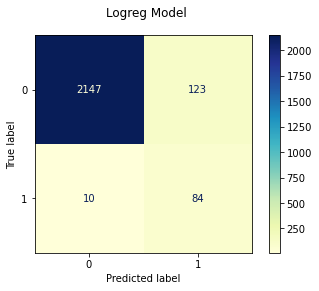

In [138]:
fig, ax = plt.subplots()

fig.suptitle("Logreg Model")

plot_confusion_matrix(logreg_model, X_train, y_train, ax=ax, cmap="YlGnBu");

### KNN

In [69]:
knn = KNeighborsClassifier(n_neighbors=5, weights = 'distance')
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(weights='distance')

In [70]:
cross_val_score(knn, X_train_sc, y_train, cv=5)

array([0.97463002, 0.97463002, 0.97885835, 0.96828753, 0.97881356])

In [71]:
y_pred_knn = knn.predict(X_test_sc)

In [123]:
knn_proba = knn.predict_proba(X_test_sc)[:, 1]

In [72]:
acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn)
rec_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

knn_model = pd.DataFrame([['KNN', acc_knn, prec_knn, rec_knn, f1_knn]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(knn_model, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.939163,0.418919,0.861111,0.563636
1,KNN,0.978454,0.952381,0.555556,0.701754


#### KNN Model Confusion Matrix Plot

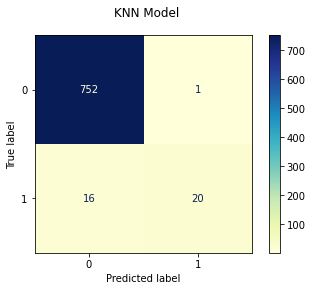

In [137]:
fig, ax = plt.subplots()

fig.suptitle("KNN Model")

plot_confusion_matrix(knn, X_test_sc, y_test, ax=ax, cmap="YlGnBu");

### Decision Tree

In [74]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [75]:
y_train_pred_dt = dt.predict(X_train)
y_pred_dt = dt.predict(X_test)

In [76]:
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

dt_model = pd.DataFrame([['Decision Tree', acc_dt, prec_dt, rec_dt, f1_dt]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(dt_model, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.939163,0.418919,0.861111,0.563636
1,KNN,0.978454,0.952381,0.555556,0.701754
2,Decision Tree,0.969582,0.700000,0.583333,0.636364


### XGBoost

In [77]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
y_train_pred_xg = xgb.predict(X_train)
y_pred_xg = xgb.predict(X_test)

In [80]:
cm = confusion_matrix(y_test, y_pred_xg)

In [81]:
acc_xg = accuracy_score(y_test, y_pred_xg)
prec_xg = precision_score(y_test, y_pred_xg)
rec_xg = recall_score(y_test, y_pred_xg)
f1_xg = f1_score(y_test, y_pred_xg)

xgb_model = pd.DataFrame([['XGBoost', acc_xg, prec_xg, rec_xg, f1_xg]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(xgb_model, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.939163,0.418919,0.861111,0.563636
1,KNN,0.978454,0.952381,0.555556,0.701754
2,Decision Tree,0.969582,0.700000,0.583333,0.636364
3,XGBoost,0.978454,0.827586,0.666667,0.738462


### RFE Model

In [82]:
rfe_features = ['finals_app', 'all_star_app', 'WS', 'AST', 'TRB', 'FT', 'title_star', '20/10_B', 'leader_pts', 'champ', 'MVP', 'DPOY', 'Finals_MVP']

In [83]:
rfe_lr = LogisticRegression(class_weight = 'balanced', C = .1)
 
selector = RFECV(estimator = rfe_lr, step = 1, cv = 5 , scoring = 'f1', n_jobs = -1, verbose = 1)

selector.fit(X_train[rfe_features], y_train) 

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.


RFECV(cv=5, estimator=LogisticRegression(C=0.1, class_weight='balanced'),
      n_jobs=-1, scoring='f1', verbose=1)

In [84]:
selected_rfe = X_train[rfe_features].columns[selector.support_]
removed_rfe = X_train[rfe_features].columns[~selector.support_]

In [85]:
len(selected_rfe)

3

In [86]:
removed_rfe

Index(['finals_app', 'AST', 'TRB', 'FT', 'title_star', '20/10_B', 'leader_pts',
       'champ', 'DPOY', 'Finals_MVP'],
      dtype='object')

In [87]:
selected_rfe

Index(['all_star_app', 'WS', 'MVP'], dtype='object')

In [88]:
cross_val_score(rfe_lr, X_train, y_train, cv=5)

array([0.95348837, 0.93657505, 0.94291755, 0.92811839, 0.9470339 ])

In [89]:
#instantiate a logistic regression object
lm_rfe = LogisticRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

#Use the model to predict on the training and test set
y_rfe = lm_rfe.predict(X_train[selected_rfe])

In [90]:
y_train_pred_rfe = lm_rfe.predict(X_train[selected_rfe])
y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

In [91]:
acc_rfe = accuracy_score(y_test, y_pred_rfe)
prec_rfe = precision_score(y_test, y_pred_rfe)
rec_rfe = recall_score(y_test, y_pred_rfe)
f1_rfe = f1_score(y_test, y_pred_rfe)

rfe_model = pd.DataFrame([['RFE Model', acc_rfe, prec_rfe, rec_rfe, f1_rfe]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(rfe_model, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.939163,0.418919,0.861111,0.563636
1,KNN,0.978454,0.952381,0.555556,0.701754
2,Decision Tree,0.969582,0.700000,0.583333,0.636364
3,XGBoost,0.978454,0.827586,0.666667,0.738462
4,RFE Model,0.979721,0.916667,0.611111,0.733333


In [92]:
pd.DataFrame({"Coefficients": lm_rfe.coef_.reshape((-1))}, index=selected_rfe)

,Coefficients
all_star_app,0.699528
WS,0.358745
MVP,2.213611


In [93]:
nba_retired[selected_rfe].corr()

,all_star_app,WS,MVP
all_star_app,1.000000,0.716413,0.522605
WS,0.716413,1.000000,0.362974
MVP,0.522605,0.362974,1.000000


#### Confusion Matrix on RFE Test Data

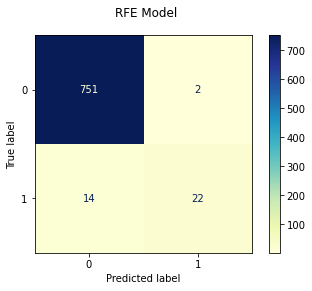

In [136]:
fig, ax = plt.subplots()

fig.suptitle("RFE Model")

plot_confusion_matrix(lm_rfe, X_test[selected_rfe], y_test, ax=ax, cmap="YlGnBu");

### Grid Search

In [95]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

logistic = LogisticRegression(class_weight = 'balanced')

gs_lr = GridSearchCV(logistic, hyperparameters, cv=5, verbose=1)

gs_lr.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.3s finished


GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [96]:
gs_lr.best_params_

{'C': 59.94842503189409, 'penalty': 'l2'}

In [97]:
gs_lr.best_estimator_.coef_

array([[ 4.35689637e-01,  1.02941880e+00, -3.46813463e-04,
        -2.78301145e-04,  8.76937367e-01, -3.56540231e-04,
         8.34617180e-02,  7.78622454e-02,  7.92098559e-02,
         1.34457992e-01,  5.41577297e-01,  1.00185351e-02,
         1.24278285e-01]])

In [98]:
X_train.describe()

,finals_app,all_star_app,AST,TRB,WS,FT,title_star,20/10_B,leader_pts,champ,MVP,DPOY,Finals_MVP
count,2364.000000,2364.000000,2364.000000,2364.000000,2364.000000,2364.000000,2364.000000,2364.000000,2364.000000,2364.000000,2364.000000,2364.000000,2364.000000
mean,0.466159,0.368020,650.013113,1250.840948,1.301005,578.468274,0.038071,0.004653,0.008883,0.233503,0.016497,0.008883,0.010575
std,1.077664,1.471096,1183.703631,2119.626622,1.942187,979.197557,0.191408,0.068069,0.093851,0.735735,0.218056,0.149500,0.170553
min,0.000000,0.000000,0.000000,0.000000,-1.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,18.750000,37.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,142.000000,282.000000,0.522500,135.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,766.000000,1632.000000,1.978571,717.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,13.000000,15806.000000,23924.000000,17.950000,8531.000000,1.000000,1.000000,1.000000,11.000000,5.000000,4.000000,6.000000


In [99]:
pd.DataFrame({"Coefficients": gs_lr.best_estimator_.coef_.reshape((-1))}, index=X_train.columns)

,Coefficients
finals_app,0.435690
all_star_app,1.029419
AST,-0.000347
TRB,-0.000278
WS,0.876937
FT,-0.000357
title_star,0.083462
20/10_B,0.077862
leader_pts,0.079210
champ,0.134458


### Decision Tree Grid Search

In [100]:
gs_dt = DecisionTreeClassifier(class_weight = 'balanced')

params_grid ={
    'criterion':['gini', 'entropy'],
    'max_depth':[None, 5, 3, 2],
    'min_samples_split': [2,10,20]
}

gridsearch_model = GridSearchCV(estimator = gs_dt, param_grid = params_grid, scoring = 'recall')

gridsearch_model.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 3, 2],
                         'min_samples_split': [2, 10, 20]},
             scoring='recall')

In [101]:
y_pred_gs_dt = gridsearch_model.predict(X_test)

In [102]:
best_model = gridsearch_model.best_estimator_
best_model.score(X_test, y_test)

acc_gs_dt = accuracy_score(y_test, y_pred_gs_dt)
prec_gs_dt = precision_score(y_test, y_pred_gs_dt)
rec_gs_dt = recall_score(y_test, y_pred_gs_dt)
f1_gs_dt = f1_score(y_test, y_pred_gs_dt)

gs_model = pd.DataFrame([['Best GS-DT', acc_gs_dt, prec_gs_dt, rec_gs_dt, f1_gs_dt]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(gs_model, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.939163,0.418919,0.861111,0.563636
1,KNN,0.978454,0.952381,0.555556,0.701754
2,Decision Tree,0.969582,0.700000,0.583333,0.636364
3,XGBoost,0.978454,0.827586,0.666667,0.738462
4,RFE Model,0.979721,0.916667,0.611111,0.733333
5,Best GS-DT,0.915082,0.340206,0.916667,0.496241


### Random Forest

In [103]:
rfr = RandomForestClassifier(n_estimators = 100, max_samples=0.5, random_state=42, class_weight = 'balanced')

rfr.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_samples=0.5,
                       random_state=42)

In [104]:
scores = cross_val_score(estimator=rfr, X=X_train,
               y=y_train, cv=5)
scores

array([0.97674419, 0.97251586, 0.98097252, 0.96828753, 0.97881356])

In [105]:
y_train_pred_rfr = rfr.predict(X_train)
y_test_pred_rfr = rfr.predict(X_test)

In [106]:
acc_rfr_tr = accuracy_score(y_train, y_train_pred_rfr)
prec_rfr_tr = precision_score(y_train, y_train_pred_rfr)
rec_rfr_tr = recall_score(y_train, y_train_pred_rfr)
f1_rfr_tr = f1_score(y_train, y_train_pred_rfr)

print(acc_rfr_tr, prec_rfr_tr, rec_rfr_tr, f1_rfr_tr)

0.9902707275803723 0.961038961038961 0.7872340425531915 0.8654970760233919


In [107]:
acc_rfr = accuracy_score(y_test, y_test_pred_rfr)
prec_rfr = precision_score(y_test, y_test_pred_rfr)
rec_rfr = recall_score(y_test, y_test_pred_rfr)
f1_rfr = f1_score(y_test, y_test_pred_rfr)

rfr_model = pd.DataFrame([['Random Forest', acc_rfr, prec_rfr, rec_rfr, f1_rfr]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(rfr_model, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.939163,0.418919,0.861111,0.563636
1,KNN,0.978454,0.952381,0.555556,0.701754
2,Decision Tree,0.969582,0.700000,0.583333,0.636364
3,XGBoost,0.978454,0.827586,0.666667,0.738462
4,RFE Model,0.979721,0.916667,0.611111,0.733333
5,Best GS-DT,0.915082,0.340206,0.916667,0.496241
6,Random Forest,0.978454,0.913043,0.583333,0.711864


In [108]:
rfr.feature_importances_

array([0.04670203, 0.20620249, 0.12763123, 0.12221384, 0.23706304,
       0.18551914, 0.03735847, 0.00196972, 0.00254271, 0.01942905,
       0.0112936 , 0.00120621, 0.00086847])

### Feature Importances

In [109]:
feat_import = {name: score 
                   for name, score 
                               in zip(X_test.columns, rfr.feature_importances_)}
feat_import

{'finals_app': 0.04670202535380699,
 'all_star_app': 0.20620249451716016,
 'AST': 0.1276312284796267,
 'TRB': 0.12221384210271852,
 'WS': 0.23706304069969575,
 'FT': 0.18551914085121773,
 'title_star': 0.03735847075909762,
 '20/10_B': 0.001969719761487759,
 'leader_pts': 0.002542705278822125,
 'champ': 0.019429050808801106,
 'MVP': 0.011293598736380181,
 'DPOY': 0.0012062135299088519,
 'Finals_MVP': 0.0008684691212765358}

In [110]:
# top_features = ['finals_app','all_star_app','AST','TRB','WS','FT','title_star','20/10_B','leader_pts','champ','MVP','DPOY','Finals_MVP','HOF']

# pair_plt_stats = nba_retired[top_features]

# sns.pairplot(pair_plt_stats, hue = 'HOF')

# plt.savefig('feature_importance.png')
# plt.show();

### 3D Mapping of Top 3 Features of HOF Players

In [134]:
fig = px.scatter_3d(nba_retired, x='all_star_app', y='WS', z='FT', color='MVP', symbol='HOF', size_max=18, opacity=0.6,\
                   color_continuous_scale='YlGnBu')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
#fig.show()

In [112]:
nba_retired.columns

Index(['Player', 'PTS', 'AST', 'TOV', 'ORB', 'DRB', 'TRB', 'BLK', 'STL',
       'Games', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'PF', 'HOF',
       'champ', 'runner_up', 'yrs_in_lg', 'teams', 'MVP', 'DPOY', 'Finals_MVP',
       'year_end', 'all_star_app', 'PPG', 'APG', 'RPG', 'BPG', 'SPG', 'TPG',
       '3PG', 'FG%', '3P%', 'FT%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'TS%',
       'PER', 'eFG%', 'HOF_Q', 'finals_app', '20/5', '20/10_A', '20/10_B',
       'title_star', 'leader_pts', 'leader_reb', 'leader_ast', 'leader_ft',
       'leader_ft%'],
      dtype='object')

In [113]:
nba_retired.sort_values(by = 'OWS', ascending = False)

,Player,PTS,AST,TOV,ORB,DRB,TRB,BLK,STL,Games,GS,MP,FG,FGA,3P,3PA,FT,FTA,PF,HOF,champ,runner_up,yrs_in_lg,teams,MVP,DPOY,Finals_MVP,year_end,all_star_app,PPG,APG,RPG,BPG,SPG,TPG,3PG,FG%,3P%,FT%,USG%,OWS,DWS,WS,WS/48,TS%,PER,eFG%,HOF_Q,finals_app,20/5,20/10_A,20/10_B,title_star,leader_pts,leader_reb,leader_ast,leader_ft,leader_ft%
74,Alex Groza,2925.0,318.0,0.0,0.0,0.0,709.0,0.0,0.0,130.0,0.0,0.0,1013.0,2136.0,0.0,0.0,899.0,1189.0,458.0,0,0,0,2,2.0,0.0,0.0,0.0,1951.0,1.0,22.500000,2.446154,5.453846,0.000000,0.000000,0.000000,0.000000,0.474251,NaN,0.756098,NaN,15.600000,2.350000,17.950000,NaN,0.550000,NaN,0.474000,1,0,0,0,0,0,0,0,0,0,1
2938,Oscar Robertson,26710.0,9887.0,0.0,71.0,208.0,7804.0,4.0,77.0,1040.0,0.0,43886.0,9508.0,19620.0,0.0,0.0,7694.0,9185.0,2931.0,1,1,1,14,14.0,1.0,0.0,0.0,1974.0,12.0,25.682692,9.506731,7.503846,0.003846,0.074038,0.000000,0.000000,0.484608,NaN,0.837670,NaN,10.850000,2.657143,13.507143,0.202929,0.560000,22.807143,0.482643,1,2,1,0,0,1,1,0,1,1,1
3931,Wilt Chamberlain,31419.0,4643.0,0.0,0.0,0.0,23924.0,0.0,0.0,1045.0,0.0,47859.0,12681.0,23497.0,0.0,0.0,6057.0,11862.0,2075.0,1,2,4,14,15.0,4.0,0.0,1.0,1973.0,13.0,30.066029,4.443062,22.893780,0.000000,0.000000,0.000000,0.000000,0.539686,NaN,0.510622,NaN,10.226667,6.266667,16.480000,0.244133,0.559067,26.140000,0.563000,1,6,0,0,1,1,1,1,0,1,0
2720,Michael Jordan,32292.0,5633.0,2924.0,1668.0,5004.0,6672.0,893.0,2514.0,1072.0,1039.0,41011.0,12192.0,24537.0,581.0,1778.0,7327.0,8772.0,2783.0,1,6,0,15,15.0,5.0,1.0,6.0,2003.0,13.0,30.123134,5.254664,6.223881,0.833022,2.345149,2.727612,0.541978,0.496882,0.326772,0.835271,33.6,9.993333,4.280000,14.260000,0.236600,0.559467,27.373333,0.500000,1,6,1,0,0,1,1,0,0,1,1
2871,Neil Johnston,10023.0,1269.0,0.0,0.0,0.0,5856.0,0.0,0.0,516.0,0.0,18298.0,3303.0,7435.0,0.0,0.0,3417.0,4447.0,1681.0,1,1,0,8,8.0,0.0,0.0,0.0,1959.0,6.0,19.424419,2.459302,11.348837,0.000000,0.000000,0.000000,0.000000,0.444250,NaN,0.768383,NaN,9.250000,2.275000,11.500000,0.218375,0.522250,23.187500,0.434375,1,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3295,Ron Reed,951.0,173.0,0.0,0.0,0.0,762.0,0.0,0.0,119.0,0.0,2245.0,409.0,1124.0,0.0,0.0,133.0,233.0,278.0,0,0,0,2,2.0,0.0,0.0,0.0,1967.0,0.0,7.991597,1.453782,6.403361,0.000000,0.000000,0.000000,0.000000,0.363879,NaN,0.570815,NaN,-2.150000,1.600000,-0.500000,-0.022500,0.387000,11.850000,0.363500,1,0,0,0,0,0,0,0,0,0,0
2004,Joe Fulks,4105.0,462.0,0.0,0.0,0.0,1379.0,0.0,0.0,326.0,0.0,4490.0,1494.0,4834.0,0.0,0.0,1117.0,1446.0,1151.0,1,0,0,5,5.0,0.0,0.0,0.0,1954.0,2.0,12.592025,1.417178,4.230061,0.000000,0.000000,0.000000,0.000000,0.309061,NaN,0.772476,NaN,-2.220000,2.100000,-0.140000,-0.077000,0.363200,9.033333,0.303600,1,0,0,0,0,0,0,0,0,0,1
3937,Woody Sauldsberry,4255.0,408.0,0.0,0.0,0.0,3082.0,0.0,0.0,399.0,0.0,11023.0,1891.0,5419.0,0.0,0.0,473.0,782.0,1245.0,0,1,1,6,7.0,0.0,0.0,0.0,1966.0,1.0,10.664160,1.022556,7.724311,0.000000,0.000000,0.000000,0.000000,0.348957,NaN,0.604859,NaN,-2.914286,1.771429,-1.128571,-0.046000,0.364286,7.942857,0.345286,1,2,0,0,0,1,0,0,0,0,0
2807,Milo Komenich,634.0,124.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,0.0,244.0,861.0,0.0,0.0,146.0,250.0,246.0,0,0,0,1,1.0,0.0,0.0,0.0,1950.0,0.0,9.906250,1.937500,0.000000,0.000000,0.000000,0.000000,0.000000,0.283391,NaN,0.584000,NaN,-3.700000,5.200000,1.400000,NaN,0.326000,NaN,0.283000,1,0,0,0,0,0,0,0,0,0,0


### SMOTE KNN

In [114]:
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_sc, y_train)

counter = Counter(y_train_sm)
print(counter)

Counter({0: 2270, 1: 2270})


In [115]:
sm_knn = KNeighborsClassifier(n_neighbors=5, weights = 'distance')

sm_knn_model = sm_knn.fit(X_train_sm, y_train_sm)

In [116]:
cross_val_score(sm_knn, X_train_sm, y_train_sm, cv=5)

array([0.98237885, 0.97136564, 0.98127753, 0.97246696, 0.9746696 ])

In [117]:
y_pred_sm = sm_knn.predict(X_train_sm)
y_pred_sm_test = sm_knn.predict(X_test_sc)

In [118]:
acc_sm = accuracy_score(y_test, y_pred_sm_test)
prec_sm = precision_score(y_test, y_pred_sm_test)
rec_sm = recall_score(y_test, y_pred_sm_test)
f1_sm = f1_score(y_test, y_pred_sm_test)

sm_model = pd.DataFrame([['SMOTE KNN', acc_sm, prec_sm, rec_sm, f1_sm]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(sm_model, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.939163,0.418919,0.861111,0.563636
1,KNN,0.978454,0.952381,0.555556,0.701754
2,Decision Tree,0.969582,0.700000,0.583333,0.636364
3,XGBoost,0.978454,0.827586,0.666667,0.738462
4,RFE Model,0.979721,0.916667,0.611111,0.733333
5,Best GS-DT,0.915082,0.340206,0.916667,0.496241
6,Random Forest,0.978454,0.913043,0.583333,0.711864
7,SMOTE KNN,0.944233,0.441176,0.833333,0.576923


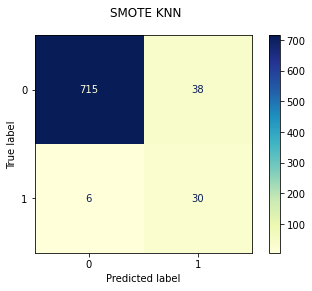

In [135]:
fig, ax = plt.subplots()

fig.suptitle("SMOTE KNN")

plot_confusion_matrix(sm_knn, X_test_sc, y_test, ax=ax, cmap="YlGnBu");

## Final Model

In [131]:
fig = px.scatter_3d(X_test_sc, x='all_star_app', y='WS', z='FT', color=knn_proba, symbol='MVP', size_max=18, opacity=0.6,\
                    color_continuous_scale='YlGnBu')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
#fig.show()